In [5]:
using Plots

In [4]:
fₓ(λ)=-log(rand())/λ

fₓ (generic function with 1 method)

In [95]:
JPP(λ,T)=begin
    Jump=[.0]
    while Jump[end]<T
        push!(Jump,Jump[end]+fₓ(λ))
    end
    Jump[1:end]
end

JPP (generic function with 1 method)

In [91]:
function Λ(λ,T)
    #Λ(T,λ)=new(JPP(λ,T)[2:end])
    jump::Vector=JPP(λ,T)[2:end]
    (t= :brak, settings...) -> begin
        if !isempty(settings)
            if settings[1] == :czas
                return jump[t]
            end
        else
            if t==:len
                return length(jump)
            end
            a=1
            while jump[a]<t
                a+=1
            end
            a-=1
        end
    end
end

Λ (generic function with 1 method)

In [92]:
A=Λ(1,20)

#27 (generic function with 2 methods)

In [93]:
A(4,:czas)

1.4259711862223092

In [22]:
:brak

:brak

# Start

In [381]:
function Ψ₁(λ=2, β=1, θ=0.1, T=100)
    A=Λ(λ, T)
    X=0
    #θ=1/θ
    c=(1+θ)*λ/β
    R=[]
    for t in 1:A(:len)
        X+=fₓ(β)
        append!(R,c*A(t,:czas)-X)
    end
    return R
end 

Ψ₁ (generic function with 5 methods)

In [386]:
function ψ(;uₘᵢₙ=1,uₘₐₓ=20,n=1e3,m=10^2,θ=0.1,β=1,T=100)
    U=LinRange(uₘᵢₙ,uₘₐₓ,m)
    #wyn=zeros(10^2)
    A=[minimum(Ψ₁(λ,β,θ,T)) for i in 1:n];

    wyn=[sum(A[i]+u<0 for i in 1:length(A)) for u in U]
    #return sum
    plot(U,wyn./n)
end

ψ (generic function with 5 methods)

In [387]:
θ=1/2
β=1
λ=1

1

In [388]:
ψ₀(u;λ=2,θ=0.1,β=1,T=100)=exp(-θ*β*u/(1+θ))/(1+θ)

ψ₀ (generic function with 1 method)

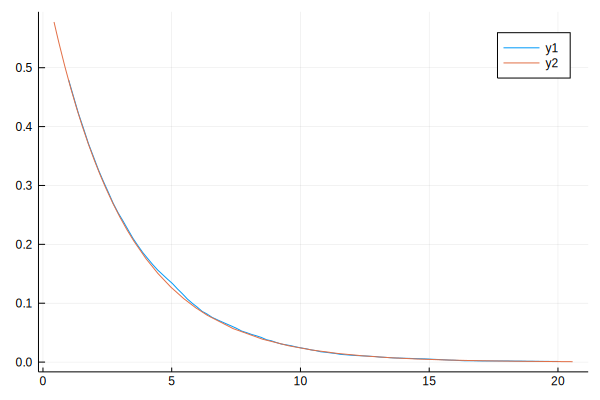

In [389]:
ψ(;n=1e4,θ=θ)
plot!(u->ψ₀(u,θ=θ))

In [268]:
A(:len)

LoadError: MethodError: objects of type Vector{Float64} are not callable
Use square brackets [] for indexing an Array.

In [269]:
LinRange(1,2,4e1)

LoadError: MethodError: no method matching LinRange(::Int64, ::Int64, ::Float64)
[0mClosest candidates are:
[0m  LinRange(::Any, ::Any, [91m::Integer[39m) at C:\Users\Kacper\AppData\Local\Programs\julia-1.7.2\share\julia\base\range.jl:521

In [270]:
b=[1,2,3]

3-element Vector{Int64}:
 1
 2
 3

In [237]:
b.-2

3-element Vector{Int64}:
 -1
  0
  1